In [1]:
import pandas as pd

In [2]:
%store -r X
%store -r y

In [3]:
X

0       .@wesley83 I have a 3G iPhone. After 3 hrs twe...
1       @jessedee Know about @fludapp ? Awesome iPad/i...
2       @swonderlin Can not wait for #iPad 2 also. The...
3       @sxsw I hope this year's festival isn't as cra...
4       @sxtxstate great stuff on Fri #SXSW: Marissa M...
                              ...                        
9088                        Ipad everywhere. #SXSW {link}
9089    Wave, buzz... RT @mention We interrupt your re...
9090    Google's Zeiger, a physician never reported po...
9091    Some Verizon iPhone customers complained their...
9092    Ï¡Ïàü_ÊÎÒ£Áââ_£â_ÛâRT @...
Name: text, Length: 8909, dtype: object

In [4]:
y

0       0
1       2
2       2
3       0
4       2
       ..
9088    2
9089    1
9090    1
9091    1
9092    1
Name: target, Length: 8909, dtype: int64

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=112221, stratify=y)

In [8]:
import regex as re
import string
import nltk
from nltk.stem.wordnet import WordNetLemmatizer

stopwords = nltk.corpus.stopwords.words('english')
stopwords.extend(['sxsw','sxswi', 'link', 'quot', 'rt'])

lemmatizer = nltk.stem.WordNetLemmatizer()

def preprocess(text):
    text = text.apply(lambda x: x.lower()).str.encode('ascii', 'ignore').str.decode('ascii')
    text = text.apply(lambda x: re.sub(r'http\S+', '', x)).apply(lambda x: re.sub(r'@\S*', '', x))

    text = text.apply(lambda x: re.split('\W+', x))
    text = text.apply(lambda x: [''.join(letter for letter in word if letter not in string.punctuation) for word in x])
    text = text.apply(lambda x: [word for word in x if word not in stopwords])
     
    return text.apply(lambda x: [lemmatizer.lemmatize(word) for word in x]).apply(lambda x: ' '.join(x))

In [10]:
X_train_processed = preprocess(X_train)

In [12]:
def build_corpus(data):
    corpus = []
    for sentence in data.iteritems():
        word_list = sentence[1].split(" ")
        corpus.append(word_list)
    return corpus

corpus = build_corpus(X_train_processed)

In [14]:
from gensim.models import Word2Vec
model = Word2Vec(corpus, size=100, min_count=1)

In [15]:
from sklearn.decomposition import PCA

# fit a 2d PCA model to the vectors
vectors = model[model.wv.vocab]
words = list(model.wv.vocab)
pca = PCA(n_components=2)
PCA_result = pca.fit_transform(vectors)

# prepare a dataframe
words = pd.DataFrame(words)
PCA_result = pd.DataFrame(PCA_result)
PCA_result['x_values'] =PCA_result.iloc[0:, 0]
PCA_result['y_values'] =PCA_result.iloc[0:, 1]
PCA_final = pd.merge(words, PCA_result, left_index=True, right_index=True)
PCA_final['word'] =PCA_final.iloc[0:, 0]
PCA_data_complet =PCA_final[['word','x_values','y_values']]

<ipython-input-15-ff639285f0c9>:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  vectors = model[model.wv.vocab]


In [18]:
PCA_data_complet

,word,x_values,y_values
0,putting,0.111453,-0.083444
1,gun,-0.048850,-0.002417
2,head,1.578252,-0.237295
3,give,2.359412,-0.030379
4,iphone,6.845045,0.062263
...,...,...,...
7557,rocksauce,-0.214121,0.007484
7558,shang,-0.246674,-0.000890
7559,accomplish,-0.261147,-0.007298
7560,flat,-0.264240,0.013847


In [56]:
data = []
for i in range(len(PCA_data_complet)):
    a = PCA_data_complet.loc[i, 'x_values']
    b = PCA_data_complet.loc[i, 'y_values']
    data.append([a,b])

In [51]:
X = np.array(data)

In [52]:
X

array([[ 0.11145258, -0.08344402],
       [-0.04885034, -0.00241743],
       [ 1.5782524 , -0.23729467],
       ...,
       [-0.2611475 , -0.0072976 ],
       [-0.26424038,  0.01384747],
       [-0.2888171 ,  0.00933982]], dtype=float32)

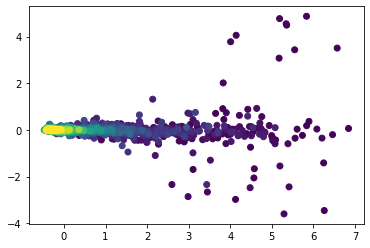

In [53]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=range(len(X)))
plt.show()

In [54]:
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=6)
k_means.fit(X)

predicted_clusters = k_means.predict(X)

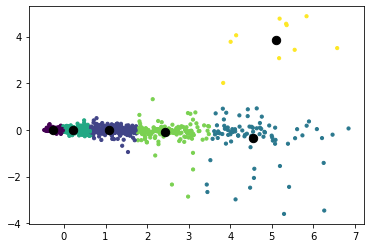

In [55]:
plt.scatter(X[:, 0], X[:, 1], c=predicted_clusters, s=10)
centers = k_means.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=70)
plt.show()

In [58]:
X_2 = np.array(data)
k_means_2 = KMeans(n_clusters=2).fit(X_2)
k_means_3 = KMeans(n_clusters=3).fit(X_2)
k_means_4 = KMeans(n_clusters=4).fit(X_2)
k_means_5 = KMeans(n_clusters=5).fit(X_2)
k_means_6 = KMeans(n_clusters=6).fit(X_2)
k_means_7 = KMeans(n_clusters=7).fit(X_2)

k_list = [k_means_2, k_means_3, k_means_4, k_means_5, k_means_6, k_means_7]

In [59]:
wcss_score = []
for model in k_list:
    wcss_score.append(model.inertia_)

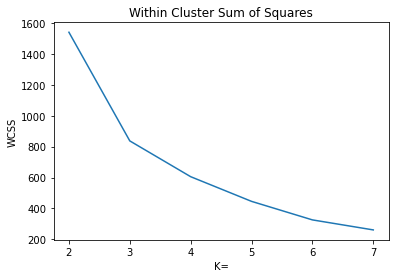

In [60]:
plt.plot([2, 3, 4, 5, 6, 7], wcss_score)
plt.xticks([2, 3,4,5,6,7])
plt.title('Within Cluster Sum of Squares')
plt.ylabel('WCSS')
plt.xlabel('K=')
plt.show()

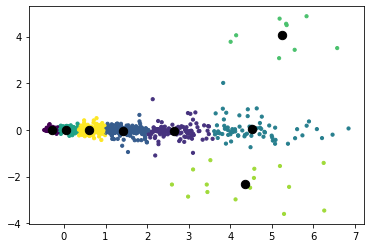

In [76]:
k_means = KMeans(n_clusters=8)
k_means.fit(X)

predicted_clusters = k_means.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=predicted_clusters, s=10)
centers = k_means.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=70)
plt.show()

In [62]:
centers

array([[ 1.0798836e+00, -2.3246532e-02],
       [-2.0243871e-01,  2.4016947e-03],
       [ 3.8914115e+00, -1.6198626e-03]], dtype=float32)

In [64]:
cluster_center_1 = centers[0]
cluster_center_2 = centers[1]
cluster_center_3 = centers[2]

In [67]:
word1_x = cluster_center_1[0]
word1_y = cluster_center_1[1]

word2_x = cluster_center_2[0]
word2_y = cluster_center_2[1]

word3_x = cluster_center_3[0]
word3_y = cluster_center_3[1]

In [70]:
word1_x

1.0798836

In [74]:
PCA_data_complet.loc[(PCA_data_complet['x_values']==word1_x) & (PCA_data_complet['y_values']==word1_y)]

,word,x_values,y_values


In [75]:
PCA_data_complet.loc[(PCA_data_complet['x_values']==word2_x) & (PCA_data_complet['y_values']==word2_y)]

,word,x_values,y_values


In [72]:
PCA_data_complet

,word,x_values,y_values
0,putting,0.111453,-0.083444
1,gun,-0.048850,-0.002417
2,head,1.578252,-0.237295
3,give,2.359412,-0.030379
4,iphone,6.845045,0.062263
...,...,...,...
7557,rocksauce,-0.214121,0.007484
7558,shang,-0.246674,-0.000890
7559,accomplish,-0.261147,-0.007298
7560,flat,-0.264240,0.013847


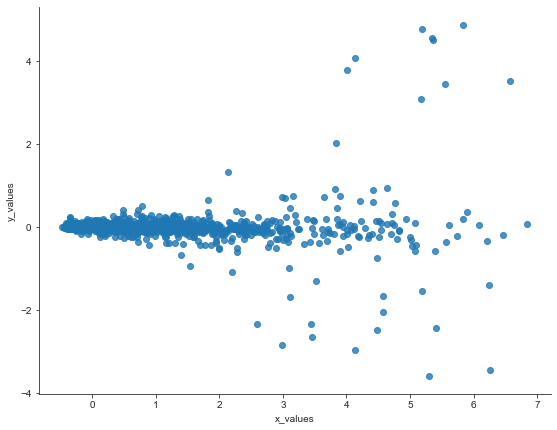

In [78]:
import seaborn as sns

sns.set_style('ticks')
fig = sns.lmplot(x='x_values', y='y_values',
           data = PCA_data_complet,
           fit_reg=False,
           legend=True,)
fig = plt.gcf()
fig.set_size_inches(8, 6)
plt.show()

In [79]:
def mbkmeans_clusters(
	X, 
    k, 
    mb, 
    print_silhouette_values, 
):
    """Generate clusters and print Silhouette metrics using MBKmeans

    Args:
        X: Matrix of features.
        k: Number of clusters.
        mb: Size of mini-batches.
        print_silhouette_values: Print silhouette values per cluster.

    Returns:
        Trained clustering model and labels based on X.
    """
    km = MiniBatchKMeans(n_clusters=k, batch_size=mb).fit(X)
    print(f"For n_clusters = {k}")
    print(f"Silhouette coefficient: {silhouette_score(X, km.labels_):0.2f}")
    print(f"Inertia:{km.inertia_}")

    if print_silhouette_values:
        sample_silhouette_values = silhouette_samples(X, km.labels_)
        print(f"Silhouette values:")
        silhouette_values = []
        for i in range(k):
            cluster_silhouette_values = sample_silhouette_values[km.labels_ == i]
            silhouette_values.append(
                (
                    i,
                    cluster_silhouette_values.shape[0],
                    cluster_silhouette_values.mean(),
                    cluster_silhouette_values.min(),
                    cluster_silhouette_values.max(),
                )
            )
        silhouette_values = sorted(
            silhouette_values, key=lambda tup: tup[2], reverse=True
        )
        for s in silhouette_values:
            print(
                f"    Cluster {s[0]}: Size:{s[1]} | Avg:{s[2]:.2f} | Min:{s[3]:.2f} | Max: {s[4]:.2f}"
            )
    return km, km.labels_

In [82]:
from sklearn import cluster
from sklearn import metrics
kmeans = cluster.KMeans(n_clusters=10)
kmeans.fit(X)
 
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
 
print ("Cluster id labels for inputted data")
print (labels)
print ("Centroids data")
print (centroids)
 
print ("Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):")
print (kmeans.score(X))
 
silhouette_score = metrics.silhouette_score(X, labels, metric='euclidean')
 
print ("Silhouette_score: ")
print (silhouette_score)

Cluster id labels for inputted data
[4 4 9 ... 0 0 0]
Centroids data
[[-2.8963944e-01  3.8324278e-03]
 [ 4.0640798e+00  7.6702498e-02]
 [ 9.4478273e-01 -9.3045020e-03]
 [ 5.2409997e+00  4.0601029e+00]
 [-3.8802661e-02 -2.7985187e-04]
 [ 5.5016079e+00 -2.2501647e-01]
 [ 2.6435959e+00 -6.3341103e-02]
 [ 4.2150536e+00 -2.3875744e+00]
 [ 3.6843762e-01 -6.1566858e-03]
 [ 1.6501051e+00 -5.3727545e-02]]
Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):
-149.95079040527344
Silhouette_score: 
0.61259717


In [87]:
kmeans = cluster.KMeans(n_clusters=7)
kmeans.fit(X)
 
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
 
print ("Cluster id labels for inputted data")
print (labels)
print ("Centroids data")
print (centroids)
 
print ("Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):")
print (kmeans.score(X))
 
silhouette_score = metrics.silhouette_score(X, labels, metric='euclidean')
 
print ("Silhouette_score: ")
print (silhouette_score)

Cluster id labels for inputted data
[3 1 0 ... 1 1 1]
Centroids data
[[ 1.0467225e+00 -1.9328071e-02]
 [-2.6045686e-01  3.4378096e-03]
 [ 4.4416862e+00  1.1404426e-02]
 [ 2.0322403e-01 -4.1652704e-03]
 [ 5.2409997e+00  4.0601029e+00]
 [ 4.3505082e+00 -2.3227251e+00]
 [ 2.3464789e+00 -5.8339357e-02]]
Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):
-261.2698974609375
Silhouette_score: 
0.69077307


In [88]:
kmeans = cluster.KMeans(n_clusters=6)
kmeans.fit(X)
 
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
 
print ("Cluster id labels for inputted data")
print (labels)
print ("Centroids data")
print (centroids)
 
print ("Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):")
print (kmeans.score(X))
 
silhouette_score = metrics.silhouette_score(X, labels, metric='euclidean')
 
print ("Silhouette_score: ")
print (silhouette_score)

Cluster id labels for inputted data
[3 0 1 ... 0 0 0]
Centroids data
[[-2.6141739e-01  3.4703985e-03]
 [ 1.0721327e+00 -2.0600826e-02]
 [ 2.4362793e+00 -9.9611677e-02]
 [ 2.0057870e-01 -4.1722003e-03]
 [ 5.0998869e+00  3.8555877e+00]
 [ 4.5486407e+00 -3.5141769e-01]]
Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):
-326.07305908203125
Silhouette_score: 
0.690148


In [89]:
kmeans = cluster.KMeans(n_clusters=5)
kmeans.fit(X)
 
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
 
print ("Cluster id labels for inputted data")
print (labels)
print ("Centroids data")
print (centroids)
 
print ("Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):")
print (kmeans.score(X))
 
silhouette_score = metrics.silhouette_score(X, labels, metric='euclidean')
 
print ("Silhouette_score: ")
print (silhouette_score)

Cluster id labels for inputted data
[0 0 1 ... 0 0 0]
Centroids data
[[-2.2973606e-01  2.8484629e-03]
 [ 2.0133216e+00 -6.0288560e-02]
 [ 4.3904982e+00 -3.7185460e-01]
 [ 5.8186519e-01 -7.6245931e-03]
 [ 5.0998869e+00  3.8555877e+00]]
Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):
-444.954345703125
Silhouette_score: 
0.75296336


In [90]:
kmeans = cluster.KMeans(n_clusters=4)
kmeans.fit(X)
 
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
 
print ("Cluster id labels for inputted data")
print (labels)
print ("Centroids data")
print (centroids)
 
print ("Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):")
print (kmeans.score(X))
 
silhouette_score = metrics.silhouette_score(X, labels, metric='euclidean')
 
print ("Silhouette_score: ")
print (silhouette_score)

Cluster id labels for inputted data
[0 0 1 ... 0 0 0]
Centroids data
[[-2.27252021e-01  2.81825801e-03]
 [ 2.15106058e+00 -1.11665584e-01]
 [ 6.30408883e-01 -8.47160164e-03]
 [ 4.56035233e+00  1.52720600e-01]]
Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):
-605.5402221679688
Silhouette_score: 
0.7581696


In [91]:
kmeans = cluster.KMeans(n_clusters=3)
kmeans.fit(X)
 
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
 
print ("Cluster id labels for inputted data")
print (labels)
print ("Centroids data")
print (centroids)
 
print ("Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):")
print (kmeans.score(X))
 
silhouette_score = metrics.silhouette_score(X, labels, metric='euclidean')
 
print ("Silhouette_score: ")
print (silhouette_score)

Cluster id labels for inputted data
[0 0 2 ... 0 0 0]
Centroids data
[[-2.0157860e-01  2.3387382e-03]
 [ 3.9001904e+00 -4.4327104e-04]
 [ 1.0905054e+00 -2.3206113e-02]]
Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):
-837.027587890625
Silhouette_score: 
0.8021095
